## STEP1. Make a toy dataset

In [1]:
## Toy dataset
train_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
    ['Yellow', 4, 'Lemon']
]

In [2]:
columns = ['color', 'diameter', 'label']

---
## STEP2. Make useful functions

In [3]:
def unique_vals(rows, col):
  '''
  rows: list of row data
  col: the index of column that we want to find
  '''
  return set([row[col] for row in rows])

### Let's use _unique_vals_ function for finding the unique value!

In [4]:
unique_vals(train_data, 0)

{'Green', 'Red', 'Yellow'}

In [5]:
def class_counts(rows):
    """Counts the number of each type of example in a dataset.
    rows: list of row data
    """
    counts = {}  # a dictionary of label -> count.

    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]

        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

### Let's use _class_counts_ function!

In [6]:
class_counts(train_data)

{'Apple': 2, 'Grape': 2, 'Lemon': 2}

In [7]:
def is_numeric(value):

  return isinstance(value, int) or isinstance(value, float)

### Let's use _is_numeric_ function!

In [8]:
print(is_numeric(7), is_numeric('Blue'))

True False


---
## STEP3. Make a __Question__ class
- <font color='blue'>*Constructors* in python
  - Instantiating an object.  
  - Initialize to the data members of the class when an object of class is created
- <font color='blue'>*__ repr __ function* in python
  - Returns the object representation in string format.

In [9]:
class Question:
  ## Constructor
  def __init__(self, column, value):
    self.column = column
    self.value = value

  def compare_with_question(self, example):
    '''
    Arguments:
    example -- List of row data (EX. ['Blue', 2, 'Blueberry'])
    '''
    val = example[self.column]

    if is_numeric(val):
      return val >= self.value
    else:
      return val == self.value

  ## Python __repr__() function returns the object representation in string format.
  def __repr__(self):
    condition = "=="

    if is_numeric(self.value):
      condition = ">="
    return "Is {} {} {}?".format(columns[self.column], condition, str(self.value))

### 💁‍♀️ : Let's implement __Quesetion__ class!

In [10]:
Question(1, 3)

Is diameter >= 3?

In [11]:
Question(0, 'Green')

Is color == Green?

-----
## STEP4. Let's make __partition__ function!

In [12]:
def partition(rows, question):
  """Partitions a dataset
  Arguments:
  rows -- List of row data
  question -- An object of Question class
  """

  true_rows, false_rows = [], []

  for row in rows:
    if question.compare_with_question(row):
      true_rows.append(row)
    else:
      false_rows.append(row)

  return true_rows, false_rows

### 💁‍♀️ : If we partition __'train_data'__ with a question  <font color='red'>"Is color == Red🖍",<font color='black'> what is the true_rows and false_rows?

In [13]:
true_rows, false_rows = partition(train_data, Question(0, 'Red'))

In [14]:
print("The true_rows\n ===> ", true_rows, "\nThe false_rows\n ===> ", false_rows)

The true_rows
 ===>  [['Red', 1, 'Grape'], ['Red', 1, 'Grape']] 
The false_rows
 ===>  [['Green', 3, 'Apple'], ['Yellow', 3, 'Apple'], ['Yellow', 3, 'Lemon'], ['Yellow', 4, 'Lemon']]


----
## STEP5. Let's calculate __"Entropy"__

In [15]:
import numpy as np
from math import log2, e

In [16]:
def entropy(labels, base=None):
  """ Computes entropy of label distribution.
  Arguments:
  labels -- Lists of data's label
  """

  n_labels = len(labels)

  if n_labels <= 1:
    return 0

  counts = class_counts(labels) # return "dict{class_label : counts}"
  probs = [counts[key]/n_labels for key in counts.keys()]

  n_classes = np.count_nonzero(probs)

  if n_classes <= 1:
    return 0

  ent = 0.

  # Compute entropy
  # base = e if base is None else base
  for i in probs:
    ent -= i * log2(i)

  return ent

### 💁‍♀️ : In ___pure dataset___, how much entropy value did you get?

In [17]:
## Pure case
pure = [['Apple'],
        ['Apple']]

# this will return 0
entropy(pure)

0

### 💁‍♀️ : In ___impure dataset___, how much entropy value did you get?

In [18]:
## Impure case
impure = [['Apple'],
          ['Orange']]

entropy(impure)

1.0

In [19]:
# Now, we'll look at a dataset with many different labels
impure = [['Apple'],
          ['Orange'],
          ['Grape'],
          ['Grapefruit'],
          ['Blueberry']]

# This will return 2.32
entropy(impure)

2.321928094887362

----
## STEP6. Let's calculate __information gain__

In [20]:
def info_gain(left, right, current_uncertainty):
    """Information Gain.

    IG = The uncertainty of the starting node - the weighted impurity of two child nodes.
    """
    p = float(len(left)) / (len(left) + len(right))

    print("(1) Avg of Impurity = {:.4f} * {:.4f} + {:.4f} * {:.4f}".format(p, entropy(left),
                                                                           (1-p), entropy(right)))
    print("(2) Current uncertainty = {:.4f}".format(current_uncertainty))

    IG = current_uncertainty - (p * entropy(left) + (1 - p) * entropy(right))
    print("(3) Information gain = {:.4f} - ({:.4f} * {:.4f} + {:.4f} * {:.4f})= {:.4f}\n".
          format(current_uncertainty, p, entropy(left), 1-p, entropy(right), IG))

    return IG

In [21]:
current_uncertainty = entropy(train_data)
print("\nCurrent uncertainty ===> {:.4f}".format(current_uncertainty))


Current uncertainty ===> 1.5850


### 💁‍♀️ : How much information do we gain <font color='green'>by partitioning on 'Green'?

In [22]:
print('Question? ', Question(0, 'Green'))

true_rows, false_rows = partition(train_data, Question(0, 'Green'))
print("True_rows ===> {}".format(true_rows))
print("False rows ===> {}\n".format(false_rows))

print("\nThe information gain by partitioning on \"Green\" is {:.4f}".format(
    info_gain(true_rows, false_rows, current_uncertainty)))

Question?  Is color == Green?
True_rows ===> [['Green', 3, 'Apple']]
False rows ===> [['Yellow', 3, 'Apple'], ['Red', 1, 'Grape'], ['Red', 1, 'Grape'], ['Yellow', 3, 'Lemon'], ['Yellow', 4, 'Lemon']]

(1) Avg of Impurity = 0.1667 * 0.0000 + 0.8333 * 1.5219
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.1667 * 0.0000 + 0.8333 * 1.5219)= 0.3167


The information gain by partitioning on "Green" is 0.3167


### 💁‍♀️: How much information do we gain <font color='blue'>by partitioning on __diameter >= 3__?

In [23]:
print('Question? ', Question(1, 3))

true_rows, false_rows = partition(train_data, Question(1, 3))
print("True_rows ===> {}".format(true_rows))
print("False rows ===> {}\n".format(false_rows))

print("\nThe information gain by partitioning on \"diameter >= 3\" is {:.4f}".format(
    info_gain(true_rows, false_rows, current_uncertainty)))

Question?  Is diameter >= 3?
True_rows ===> [['Green', 3, 'Apple'], ['Yellow', 3, 'Apple'], ['Yellow', 3, 'Lemon'], ['Yellow', 4, 'Lemon']]
False rows ===> [['Red', 1, 'Grape'], ['Red', 1, 'Grape']]

(1) Avg of Impurity = 0.6667 * 1.0000 + 0.3333 * 0.0000
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.6667 * 1.0000 + 0.3333 * 0.0000)= 0.9183


The information gain by partitioning on "diameter >= 3" is 0.9183


-----
## STEP7. Find **the best split** based on ___Information Gain___

In [42]:
def find_best_split(rows):

  best_gain = 0
  best_question = None

  current_uncertainty = entropy(rows)
  n_features = len(rows[0]) - 1

  for col in range(n_features):

    values = set([row[col] for row in rows])

    for val in values:

      question = Question(col, val)

      true_rows, false_rows = partition(rows, question)

      if len(true_rows) == 0 or len(false_rows) == 0:
        continue

      print('Qustion ====>>> ', question)
      gain = info_gain(true_rows, false_rows, current_uncertainty)

      if gain >= best_gain:
        best_gain, best_question = gain, question


  return best_gain, best_question

In [43]:
best_gain, best_question = find_best_split(train_data)

print("The best question ====>>>>> ", best_question)

Qustion ====>>>  Is color == Green?
(1) Avg of Impurity = 0.1667 * 0.0000 + 0.8333 * 1.5219
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.1667 * 0.0000 + 0.8333 * 1.5219)= 0.3167

Qustion ====>>>  Is color == Red?
(1) Avg of Impurity = 0.3333 * 0.0000 + 0.6667 * 1.0000
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.3333 * 0.0000 + 0.6667 * 1.0000)= 0.9183

Qustion ====>>>  Is color == Yellow?
(1) Avg of Impurity = 0.5000 * 0.9183 + 0.5000 * 0.9183
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.5000 * 0.9183 + 0.5000 * 0.9183)= 0.6667

Skipped Question: Is diameter >= 1?
Qustion ====>>>  Is diameter >= 3?
(1) Avg of Impurity = 0.6667 * 1.0000 + 0.3333 * 0.0000
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.6667 * 1.0000 + 0.3333 * 0.0000)= 0.9183

Qustion ====>>>  Is diameter >= 4?
(1) Avg of Impurity = 0.1667 * 0.0000 + 0.8333 * 1.5219
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0

----
## STEP8. Let's make a __Decision Tree!__🌲
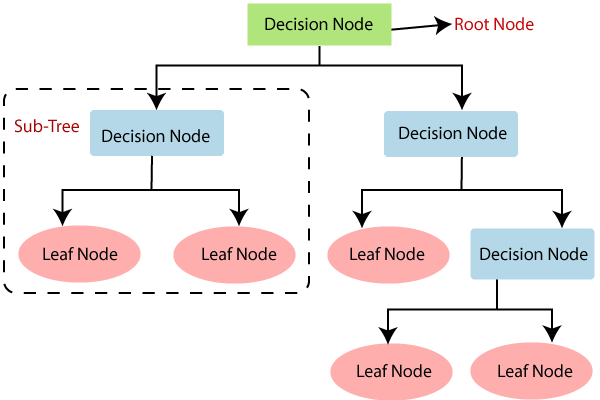

In [26]:
class Leaf:
  """A Leaf node classifies data.

    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

  def __init__(self, rows):
    ## 'self.predictions' is a dictionary of class counts.
    self.predictions = class_counts(rows)

In [27]:
class Decision_Node:
  """A Decision Node asks a question.

    This holds a reference to the question, and to the two child nodes.
    """

  def __init__(self,
               question,
               true_branch,
               false_branch):
    self.question = question
    self.true_branch = true_branch
    self.false_branch = false_branch

In [28]:
def build_tree(rows):
  """Builds the tree.
  Arguments:
  rows --- List of row data
  """
  gain, question = find_best_split(rows)

  ## If information gain is equal to 0, just return the Leaf object.
  if gain == 0:
    return Leaf(rows)

  true_rows, false_rows = partition(rows, question)

  ## Make additional tree nodes
  true_branch = build_tree(true_rows)

  false_branch = build_tree(false_rows)

  return Decision_Node(question, true_branch, false_branch)

In [29]:
def print_tree(node, spacing=""):
    """Tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

### 💁‍♀️ : Let's build one _Decision Tree_ !

In [30]:
my_tree = build_tree(train_data)
print(type(my_tree))

Qustion ====>>>  Is color == Green?
(1) Avg of Impurity = 0.1667 * 0.0000 + 0.8333 * 1.5219
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.1667 * 0.0000 + 0.8333 * 1.5219)= 0.3167

Qustion ====>>>  Is color == Red?
(1) Avg of Impurity = 0.3333 * 0.0000 + 0.6667 * 1.0000
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.3333 * 0.0000 + 0.6667 * 1.0000)= 0.9183

Qustion ====>>>  Is color == Yellow?
(1) Avg of Impurity = 0.5000 * 0.9183 + 0.5000 * 0.9183
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.5000 * 0.9183 + 0.5000 * 0.9183)= 0.6667

Qustion ====>>>  Is diameter >= 3?
(1) Avg of Impurity = 0.6667 * 1.0000 + 0.3333 * 0.0000
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.6667 * 1.0000 + 0.3333 * 0.0000)= 0.9183

Qustion ====>>>  Is diameter >= 4?
(1) Avg of Impurity = 0.1667 * 0.0000 + 0.8333 * 1.5219
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.1667 * 0.0000 + 0.8333 * 1.5219)= 0

### 💁‍♀️ : Let's print our ___Decision tree___ !

In [31]:
print_tree(my_tree)

Is diameter >= 3?
--> True:
  Is diameter >= 4?
  --> True:
    Predict {'Lemon': 1}
  --> False:
    Is color == Yellow?
    --> True:
      Predict {'Apple': 1, 'Lemon': 1}
    --> False:
      Predict {'Apple': 1}
--> False:
  Predict {'Grape': 2}


### 💁‍♀️ : Which results do you get when you classify ___'train_data[1]'___,?

In [32]:
def classify(row, node):

  ## If this node is Leaf, return predicted results.
  if isinstance(node, Leaf):
    return node.predictions ## If you don't know what data is returned, Check "Leaf" class!

  if node.question.compare_with_question(row):
    return classify(row, node.true_branch)
  else:
    return classify(row, node.false_branch)

In [33]:
## Return the each class counts
classify(train_data[0], my_tree)

{'Apple': 1}

### 💁‍♀️ : Then, Which class is ___'train_data[1]'___ classified into?

In [34]:
def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

In [35]:
print_leaf(classify(train_data[0], my_tree))

{'Apple': '100%'}

### ==> _If color is yellow and diameter is 3_, this fruit is predicted 100% 🍎.

-----
## STEP9. Let's test based on our _**Decision Tree**_

In [36]:
testing_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 4, 'Apple'],
    ['Red', 2, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

In [37]:
for row in testing_data:
    print ("Actual: %s. Predicted: %s" %
           (row[-1], print_leaf(classify(row, my_tree))))

Actual: Apple. Predicted: {'Apple': '100%'}
Actual: Apple. Predicted: {'Lemon': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Lemon. Predicted: {'Apple': '50%', 'Lemon': '50%'}


##STEP10. Visualize the decision tree with library

In [38]:
from pandas import DataFrame
train_df = DataFrame(train_data,columns=['color','diameter','label'])

✅ You don't have to understand below cell. Just run it.

In [39]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_df['color'] = encoder.fit_transform(train_df['color'])

[Text(0.3333333333333333, 0.875, 'diameter <= 2.0\nentropy = 1.585\nsamples = 100.0%\nvalue = [0.333, 0.333, 0.333]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 33.3%\nvalue = [0.0, 1.0, 0.0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'color <= 1.0\nentropy = 1.0\nsamples = 66.7%\nvalue = [0.5, 0.0, 0.5]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 16.7%\nvalue = [1.0, 0.0, 0.0]'),
 Text(0.6666666666666666, 0.375, 'diameter <= 3.5\nentropy = 0.918\nsamples = 50.0%\nvalue = [0.333, 0.0, 0.667]'),
 Text(0.5, 0.125, 'entropy = 1.0\nsamples = 33.3%\nvalue = [0.5, 0.0, 0.5]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 16.7%\nvalue = [0.0, 0.0, 1.0]')]

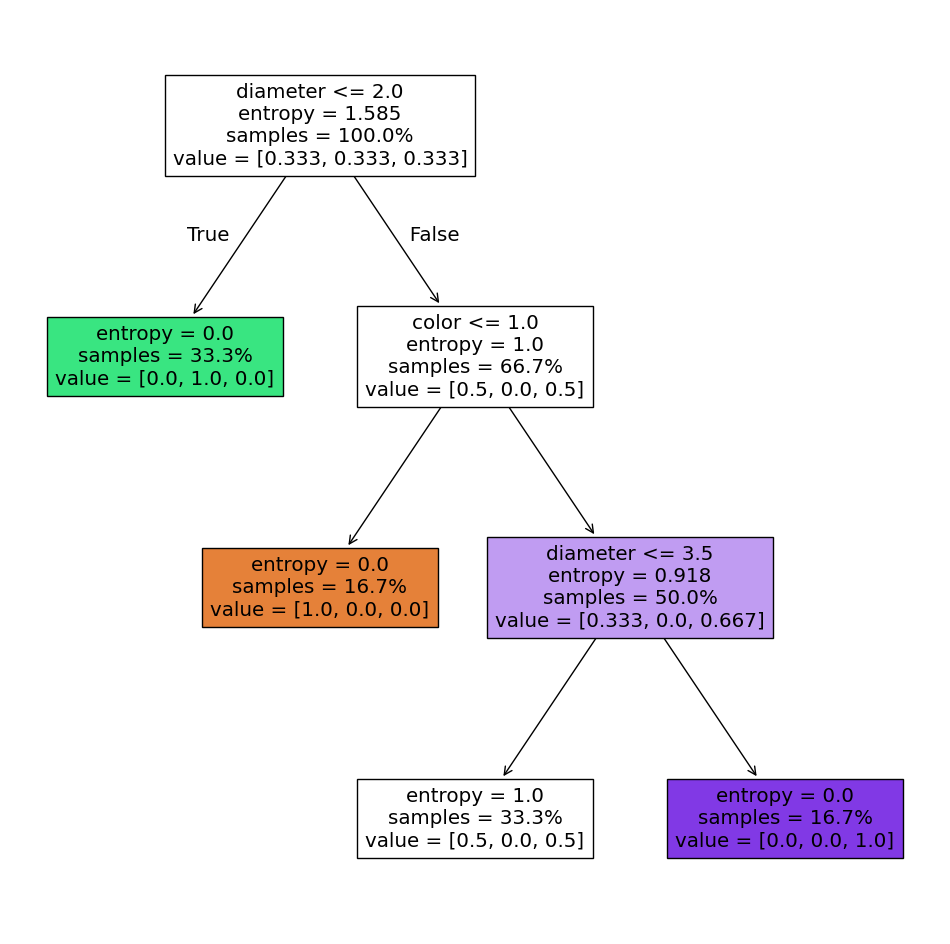

In [40]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import sklearn

decisionTree = DecisionTreeClassifier(random_state=0, criterion="entropy")

plt.figure(figsize=(12,12))
sklearn.tree.plot_tree(decisionTree.fit(train_df.iloc[:, 0:2], train_df.iloc[:, 2]), filled=True, feature_names=["color", "diameter"],proportion=True)